In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train = pd.read_csv('Train_2.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [57]:
test.shape, train.shape

((7068, 25), (21201, 29))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

In [5]:
train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [24]:
test.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long
count,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,5631.000000,199.000000,7068.000000,7068.000000,7068.000000,7068.000000
mean,2.752122,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,9.458970,23.246120,6.651759,-1.282043,36.811148,-1.282255,36.811326
std,0.624000,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,5.575689,3.591161,14.085439,0.030044,0.037962,0.034236,0.043507
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.200000,0.100000,-1.433512,36.653828,-1.422652,36.639195
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.100000,-1.301201,36.784605,-1.300921,36.786546
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.400000,2.900000,-1.281301,36.807219,-1.283219,36.807927
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.900000,4.950000,-1.257274,36.829716,-1.261256,36.828195
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,47.000000,32.100000,99.100000,-1.148352,36.991046,-1.030225,37.018958


Null values only in temeratures and Precipitation in millimeters

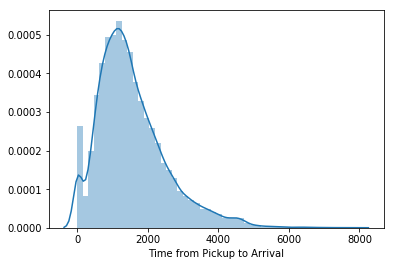

In [7]:
sns.distplot(train['Time from Pickup to Arrival'])

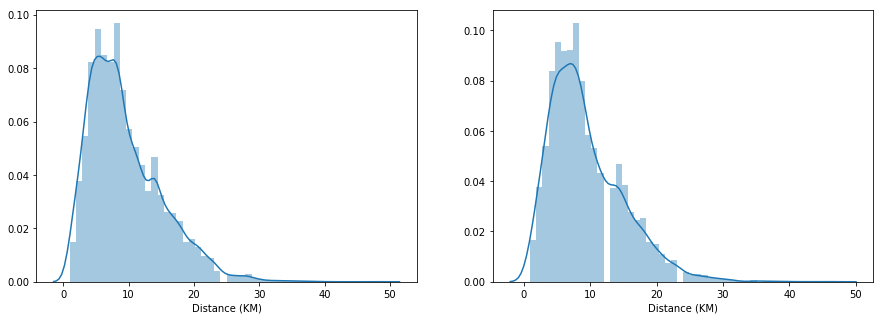

In [21]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 2, 1)
sns.distplot(train['Distance (KM)'])
fig.add_subplot(1, 2, 2)
sns.distplot(test['Distance (KM)'])

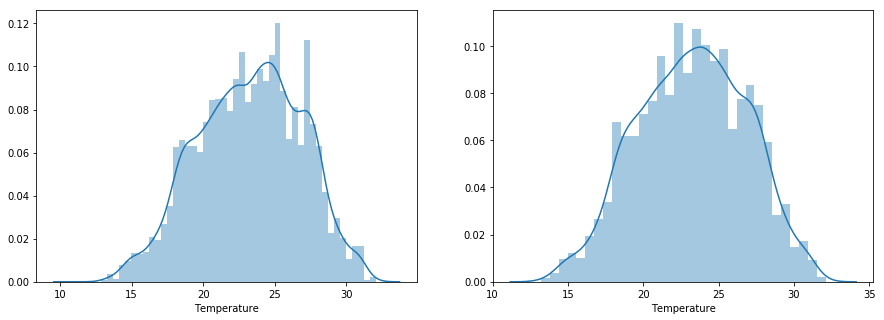

In [22]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 2, 1)
sns.distplot(train['Temperature'].dropna())
fig.add_subplot(1, 2, 2)
sns.distplot(test['Temperature'].dropna())

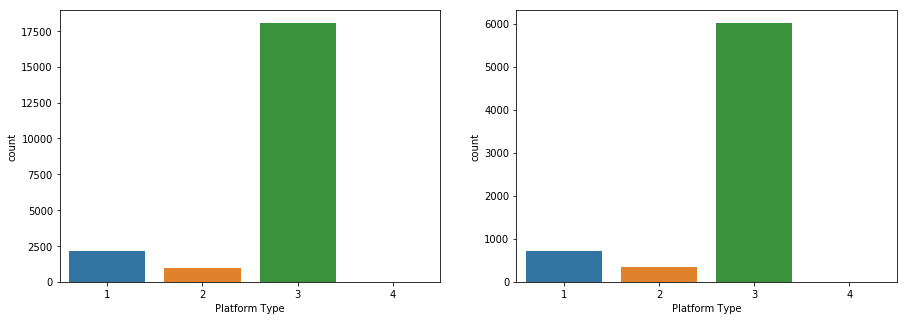

In [23]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 2, 1)
sns.countplot(x = 'Platform Type', data = train)
fig.add_subplot(1, 2, 2)
sns.countplot(x = 'Platform Type', data = test)

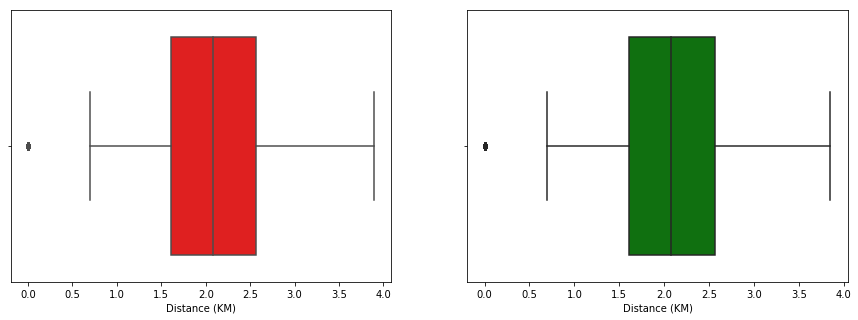

In [29]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 2, 1)
sns.boxplot(train['Distance (KM)'].transform(np.log) , color = 'red')
fig.add_subplot(1, 2, 2)
sns.boxplot(test['Distance (KM)'].transform(np.log)  , color = 'green')

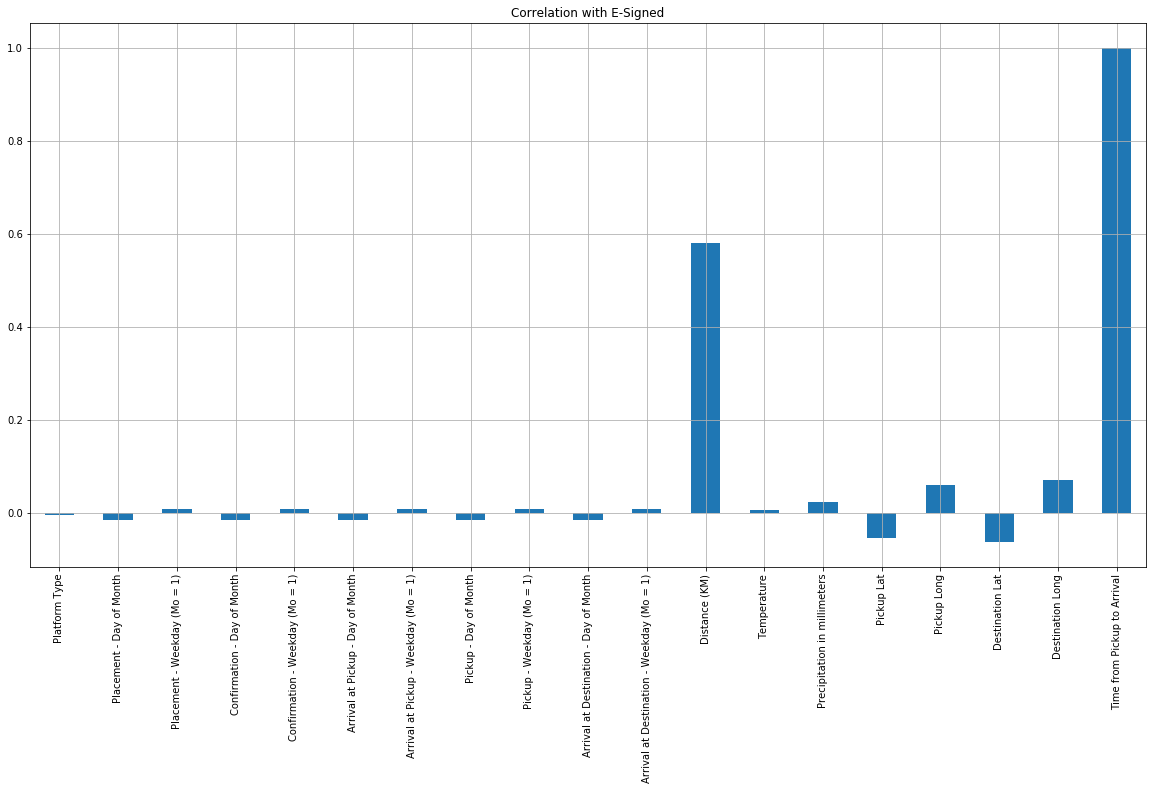

In [31]:
train.corrwith(train['Time from Pickup to Arrival']).plot.bar(figsize = (20,10), grid = True, title = 'Correlation with E-Signed')

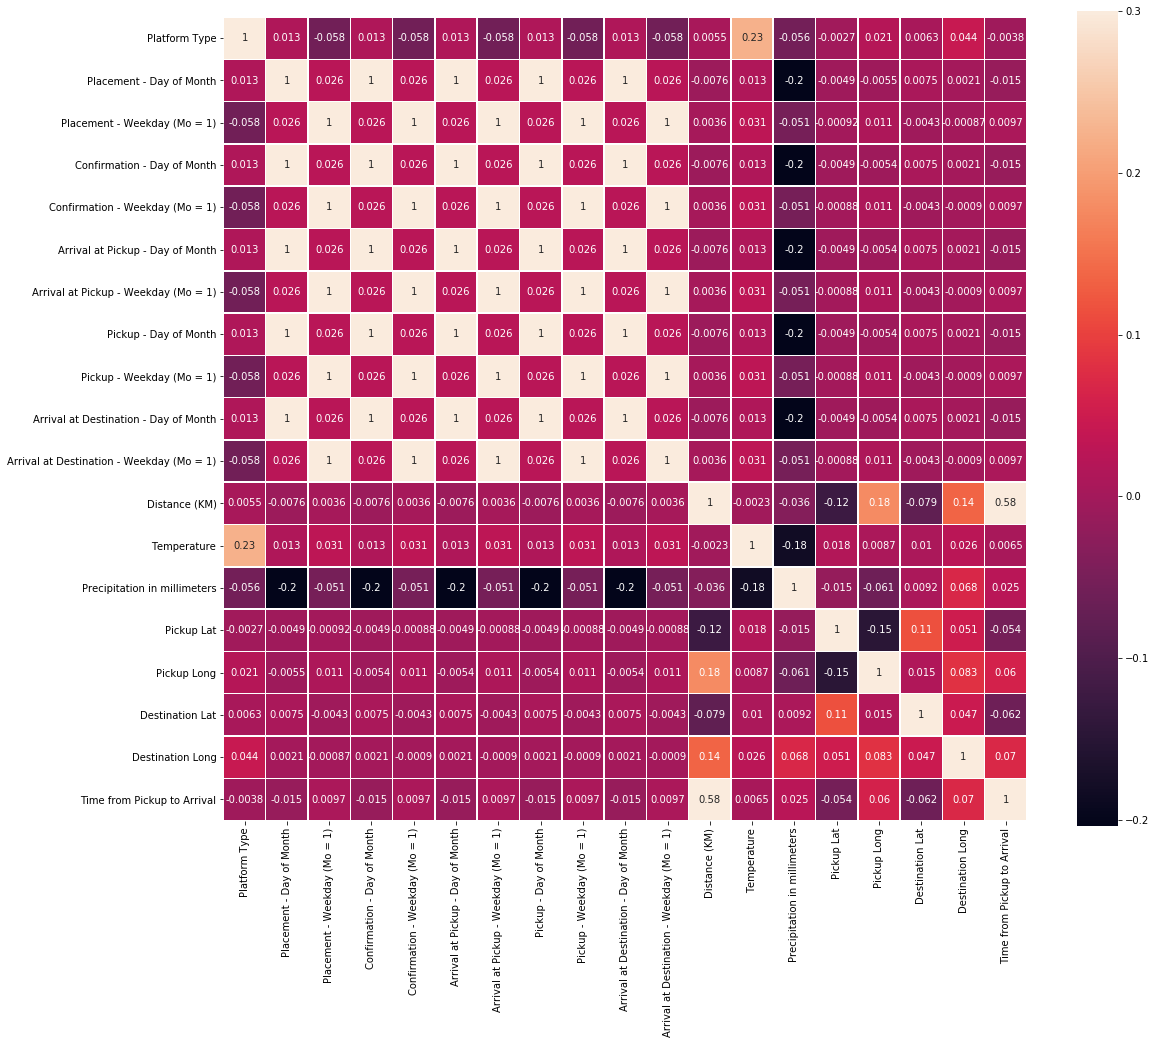

In [32]:
# correlation matrix
corr = train.corr()
f, ax = plt.subplots(figsize = (18,15))
sns.heatmap(corr, square = True, linewidths= .5, vmax = 0.3 , annot=True)

In [0]:
# getting features ready
dataset = train.drop(['Order No', 'User Id', 'Vehicle Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Temperature',
       'Precipitation in millimeters', 'Rider Id'] , axis = 1)

In [0]:
test = test.drop(['Order No', 'User Id', 'Vehicle Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time', 'Temperature',
       'Precipitation in millimeters', 'Rider Id'] , axis = 1)

In [63]:
X.shape, test.shape

((21201, 9), (7068, 9))

In [0]:
dataset['Platform Type']  ='Type' + dataset['Platform Type'].astype(str)

In [0]:
test['Platform Type']  ='Type' + test['Platform Type'].astype(str)

In [0]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [0]:
test = pd.get_dummies(test, drop_first=True)

In [0]:
X = dataset.drop(['Time from Pickup to Arrival'] , axis  = 1)
y = dataset['Time from Pickup to Arrival']

In [0]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22)

In [0]:
# Standerdise the dataset
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
test = scaler.transform(test)

In [0]:
from sklearn.metrics import mean_squared_error
def evaluate(reg):
    ypred = reg.predict(x_test)
    mse = mean_squared_error(y_test, ypred)
    rmse = np.sqrt(mse)
    print('The RMSE is {}'.format(rmse))

In [69]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
evaluate(regressor)

The RMSE is 819.2753731756598


In [52]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train, y_train)
evaluate(regressor)

The RMSE is 846.0132290563819


In [53]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(x_train, y_train)
evaluate(regressor)

The RMSE is 839.703938190502


In [54]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf', gamma='auto')
svr_regressor.fit(x_train, y_train)
evaluate(svr_regressor)

The RMSE is 907.8257738933032


In [55]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(x_train, y_train)
evaluate(tree_regressor)

The RMSE is 1017.3360390145257


In [73]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor()
regressor.fit(x_train, y_train)
evaluate(regressor)

The RMSE is 818.9435338372023


In [0]:
from xgboost import XGBRegressor
regressor = XGBRegressor(objective = 'reg:squarederror')
regressor.fit(x_train, y_train)

In [96]:
evaluate(regressor)

The RMSE is 797.2368955104504


In [103]:
from sklearn.linear_model import Lasso
regressor = Lasso()
regressor.fit(x_train, y_train)
evaluate(regressor)

The RMSE is 819.2031842480162


In [105]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=(15,), random_state=1, max_iter=1000, warm_start=True)
regressor.fit(x_train, y_train)
evaluate(regressor)

The RMSE is 807.1276243334912


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [100]:
from sklearn.linear_model import Ridge
regressor = Ridge()
regressor.fit(x_train, y_train)
evaluate(regressor)

The RMSE is 819.2755489191171


## Making Submission

In [0]:
test_data = pd.read_csv('Test.csv')

In [0]:
orders = test_data['Order No']
prediction = regressor.predict(test)
all_data = list(zip(orders, prediction.reshape(1,-1)[0].astype('float32')))

In [86]:
final_result = pd.DataFrame(all_data, columns=['Order_No', 'Time from Pickup to Arrival'])
final_result.to_csv('final_xgb.csv', index =False)
final_result.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,1618.311279
1,Order_No_12736,1250.397827
2,Order_No_768,1289.739624
3,Order_No_15332,1234.454102
4,Order_No_21373,1245.834106
